In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/JorgeJimenez/Documents/UP/DataScienceB/Presentacion2/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
df = df.dropna(subset=['TotalCharges']) # rows where TotalCharges is an empty string

In [10]:
df = df.reset_index(drop=True)

In [11]:
print(df.describe())  # for numeric variables
print(df.describe(include='object'))  # for categorical variables

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7032   7032    7032       7032         7032          7032   
unique        7032      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3549    3639       4933         6352          3385   

       InternetService OnlineSecurity OnlineBack

In [12]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
profile = ProfileReport(df, title="Pandas Profiling Report", correlations={"auto": {"calculate": False}})
profile.to_file("reporte.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 921.83it/s]


/var/folders/sc/9fn1kvh90nq2n1t913qbts5w0000gq/T/ipykernel_12348/3255187133.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp['Churn'] = df_temp['Churn'].replace({'Yes': 1, 'No': 0})


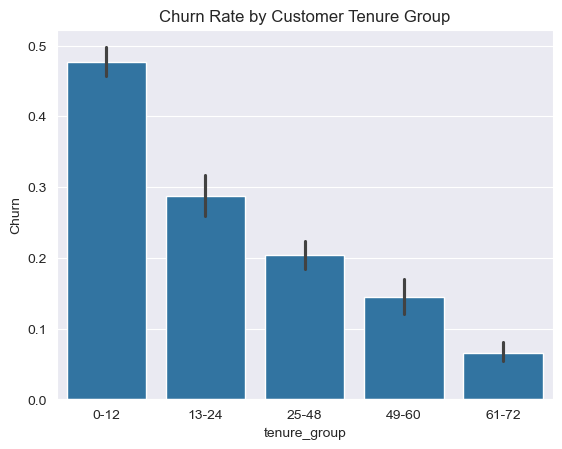

In [18]:
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].replace({'Yes': 1, 'No': 0})

sns.barplot(x='tenure_group', y='Churn', data=df_temp)
plt.title('Churn Rate by Customer Tenure Group')
plt.show()


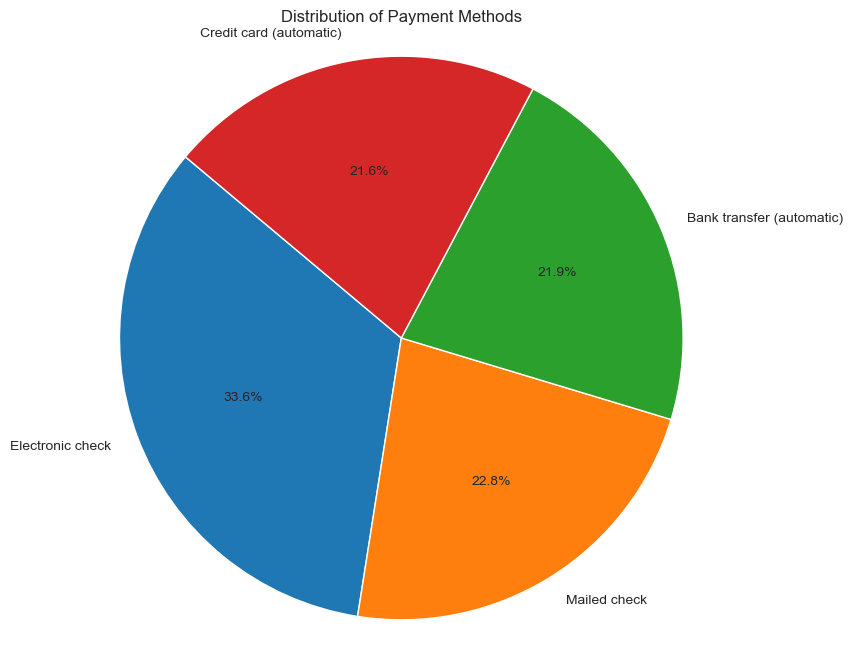

In [19]:
payment_counts = df['PaymentMethod'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # makes it a perfect circle
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

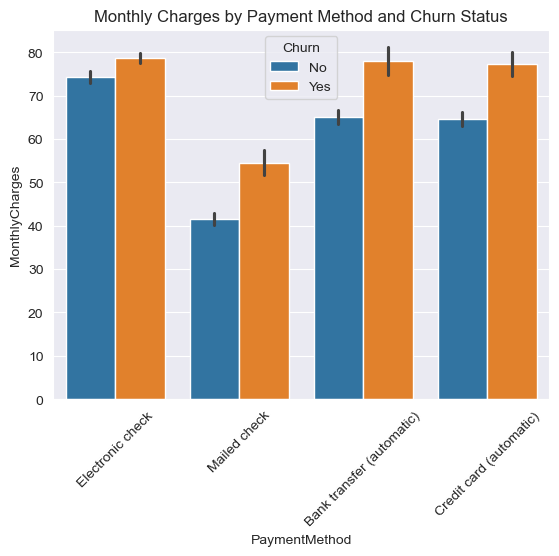

In [20]:
sns.barplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Payment Method and Churn Status')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Customer Retention Over Time')

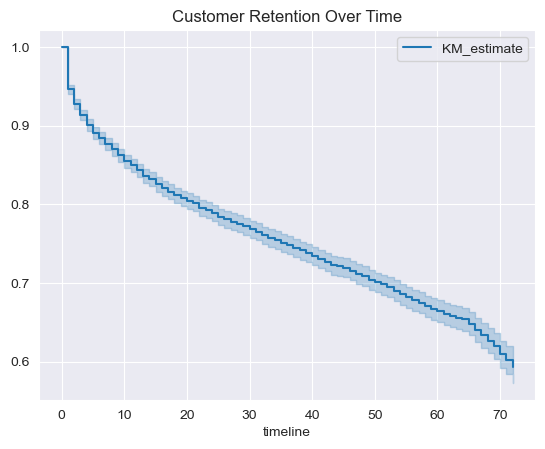

In [21]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
T = df['tenure']
E = df['Churn'].map({'Yes':1, 'No':0})

kmf.fit(T, event_observed=E)
kmf.plot()
plt.title("Customer Retention Over Time")